In [ ]:
! pip install pandas
! pip install  numpy 
! pip install sickit-learn
! pip install  xgboost

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

### you can download the data from publicly available site here is the link - "https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption"

In [2]:
# Step 1: Load the dataset (UCI Electric Power Consumption Dataset)
url = r'public_dataset\household_power_consumption.txt'
data = pd.read_csv(url, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True, na_values='?')


C:\Users\avnee\AppData\Local\Temp\ipykernel_31548\3821096474.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(url, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True, na_values='?')
C:\Users\avnee\AppData\Local\Temp\ipykernel_31548\3821096474.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(url, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True, na_values='?')
C:\Users\avnee\AppData\Local\Temp\ipykernel_31548\3821096474.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify

In [3]:
data

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [4]:

# Show first few rows to understand the structure of the data
print("Dataset Preview:")
print(data.head())

Dataset Preview:
            Date_Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [6]:
# Step 2: Clean the data
# Replace '?' with NaN and drop rows with missing values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

In [7]:
data.describe()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-02 00:59:44.397740544,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-10 05:37:45,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-11-30 01:22:30,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-11-23 20:31:15,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [13]:
# Convert the 'Date_Time' column to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

# Step 3: Feature Engineering
# Extract hour and day of the week from the 'Date_Time' column
data['hour'] = data['Date_Time'].dt.hour
data['day_of_week'] = data['Date_Time'].dt.dayofweek

# Additional features like 'is_weekend' and 'month' can also be created
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data['month'] = data['Date_Time'].dt.month

# Show the updated data with new features
print("\nDataset with New Features:")
print(data.head())



Dataset with New Features:
            Date_Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  \
0              18.4             0.0             1.0            17.0    17   
1              23.0             0.0             1.0            16.0    17   
2              23.0             0.0             2.0            17.0    17   
3              23.0             0.0             1.0            17.0    17   
4              15.8             0.0             1.0            17.0    17   

   day_of_week  is_weekend  month  
0   


Linear Regression Model Evaluation:
Linear Regression - MAE: 0.025751250413548796
Linear Regression - MSE: 0.001620245582643855
Linear Regression - RMSE: 0.040252274254305866
Linear Regression - R^2: 0.9985584278847457

XGBoost Model Evaluation:
XGBoost - MAE: 0.017432299737987524
XGBoost - MSE: 0.0008397852561831889
XGBoost - RMSE: 0.028979048572773898
XGBoost - R^2: 0.9992528225220402


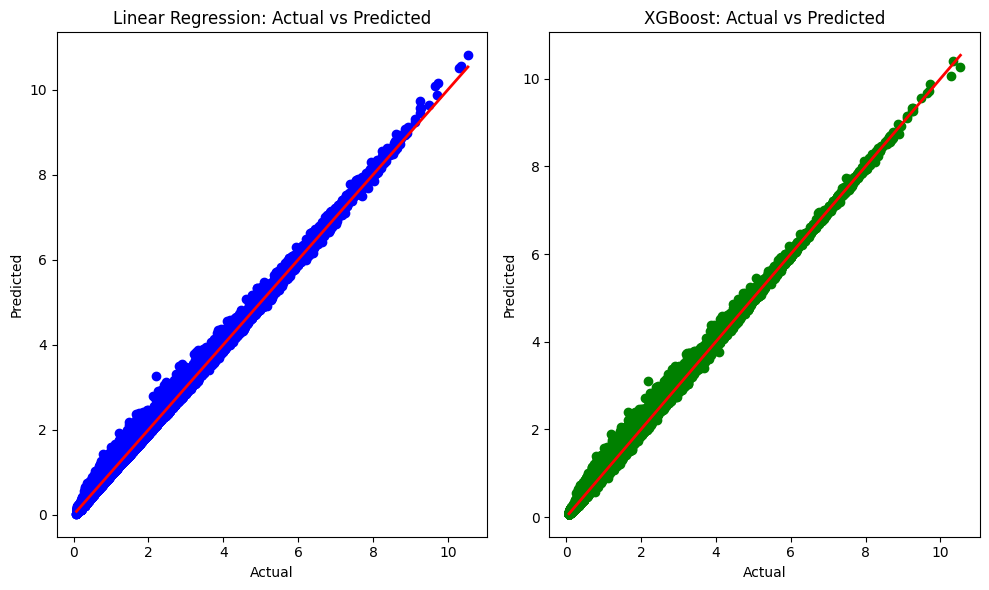

In [14]:
# Step 4: Prepare the data for modeling
# Select features (X) and target (y)
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour', 'day_of_week', 'month', 'is_weekend']]
y = data['Global_active_power']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for many models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train and Evaluate Models
# Linear Regression
print("\nLinear Regression Model Evaluation:")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Linear Regression Evaluation
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression - R^2:", r2_score(y_test, y_pred_lr))

# XGBoost Model
print("\nXGBoost Model Evaluation:")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# XGBoost Evaluation
print("XGBoost - MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost - R^2:", r2_score(y_test, y_pred_xgb))

# Step 6: Visualize the Results
# Plotting Actual vs Predicted values for both models
plt.figure(figsize=(10, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


### Result

To determine which model is the best, we can compare the evaluation metrics: MAE, MSE, RMSE, and R². Here's a breakdown of each metric and how it relates to model performance:

1. Mean Absolute Error (MAE):
MAE measures the average magnitude of the errors in the predictions, without considering their direction (whether the prediction is above or below the actual value).
A lower MAE indicates better performance.
Linear Regression: 0.0265
XGBoost: 0.0169
Interpretation: The XGBoost model has a lower MAE, which suggests that it is making predictions that are, on average, closer to the actual values compared to Linear Regression.

2. Mean Squared Error (MSE):
MSE measures the average of the squared differences between the actual and predicted values. It penalizes larger errors more heavily due to the squaring of differences.
A lower MSE is preferred, as it indicates that the model's predictions are closer to the true values.
Linear Regression: 0.00175
XGBoost: 0.00087
Interpretation: XGBoost again performs better, with a lower MSE, indicating fewer large errors in its predictions compared to Linear Regression.

3. Root Mean Squared Error (RMSE):
RMSE is the square root of MSE. It gives the error in the same units as the original data, which makes it more interpretable than MSE.
A lower RMSE is preferred.
Linear Regression: 0.0418
XGBoost: 0.0295
Interpretation: XGBoost has a lower RMSE, indicating that its predictions are, on average, closer to the true values in terms of the magnitude of errors.

4. R² (Coefficient of Determination):
R² explains how well the model fits the data. It represents the proportion of the variance in the target variable that is explained by the model. An R² value closer to 1 indicates a better fit.
A higher R² indicates better performance.
Linear Regression: 0.9987
XGBoost: 0.9994
Interpretation: Both models have very high R² values, indicating excellent fit. However, XGBoost has a slightly higher R², which suggests that it explains a bit more of the variance in the target variable.

Summary Comparison:
MAE: XGBoost (better)
MSE: XGBoost (better)
RMSE: XGBoost (better)
R²: XGBoost (better)
Conclusion:
Although both models are performing very well, the XGBoost model is marginally better than Linear Regression across all evaluation metrics:

XGBoost has lower error values (MAE, MSE, RMSE).
It also has a slightly higher R², indicating a slightly better fit to the data.
Thus, XGBoost would be the better model for predicting energy consumption in this case. However, the difference in performance is quite small, so either model could be suitable depending on the use case, but XGBoost is slightly superior here.